Installing Dependencies


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
df = pd.read_csv("archive/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

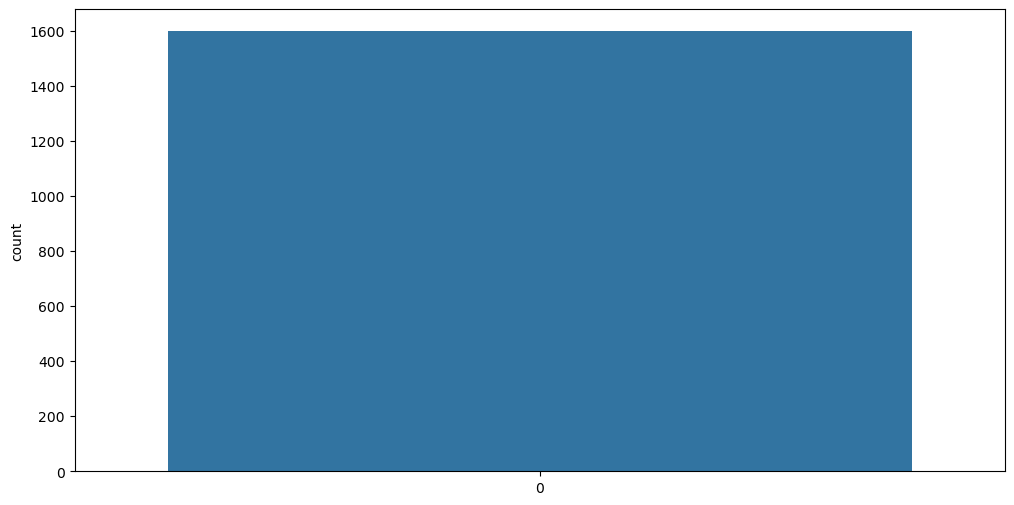

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(df['quality'])
plt.show()

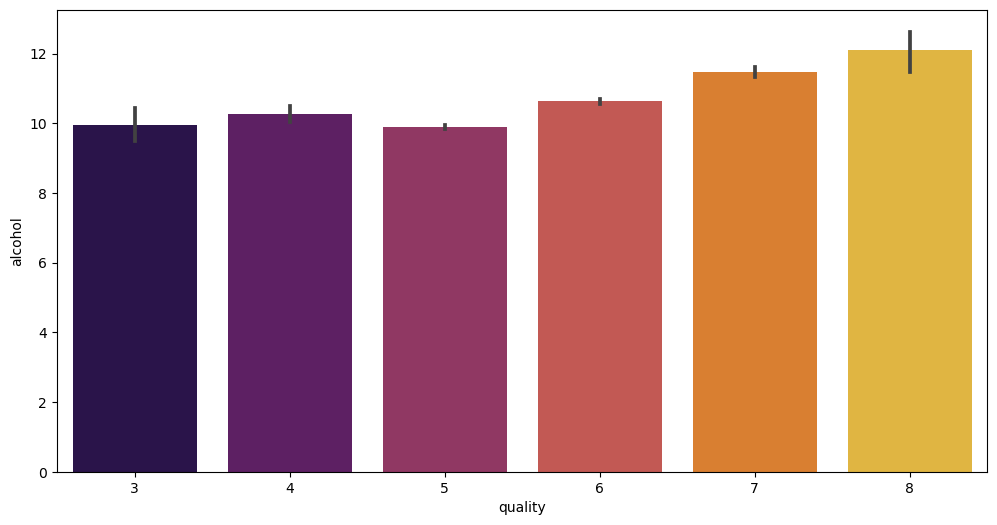

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'quality', y = 'alcohol', data= df, palette="inferno")
plt.show()

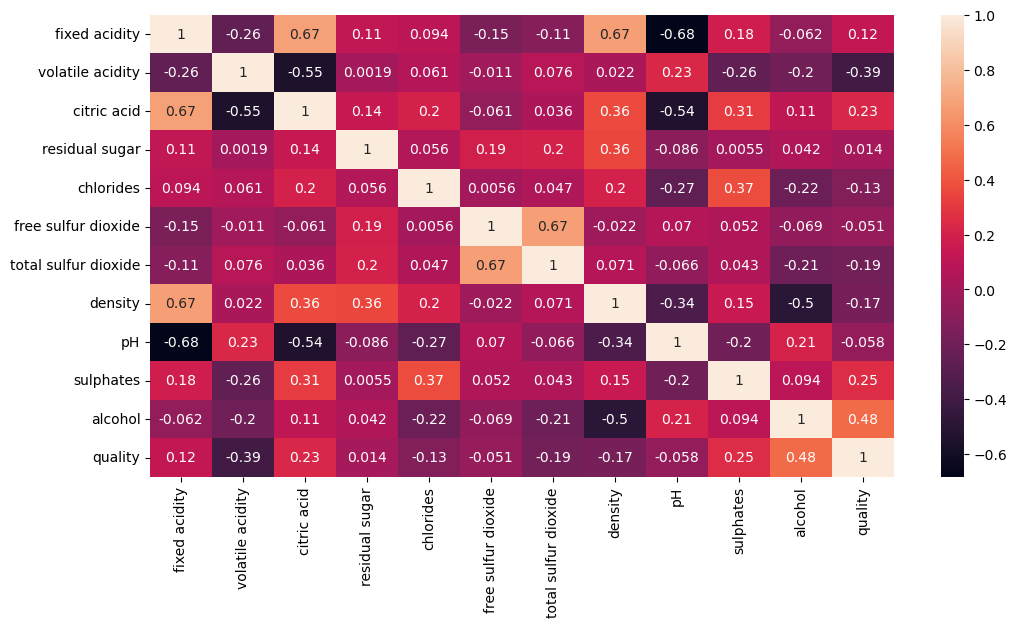

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
x = df.drop(['quality'], axis= 1)
y = df['quality']


DATA PRE-PROCESSING

In [11]:
## oversampling
from imblearn.over_sampling import SMOTE
os=SMOTE()
x_res,y_res=os.fit_resample(x, y)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler

stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)

# Linear Regression

In [19]:
from sklearn.metrics import accuracy_score

In [17]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_std, y_train)


LinearRegression()

In [21]:

predictions = lr.predict(x_test_std).round()
print(accuracy_score(y_test, predictions))

0.4315403422982885
